##### Objectif: Entrainer des modèles de machine learning sur une base de données et réaliser des sorties graphiques utiles sur ces mêmes données (analyse spaciale, temporelle, dépendance entre les variables, ...)

##### input : une base de données \"accidentsVelo.xlsx\" au format excel regroupant différentes informations sur les accidents de vélo en france entre 2005 et 2021. Les composantes de la base sont les suivantes:
    - Num_Acc : Identifiant unique de l'accident
    - date : date de l'accident au format jj/mm/aaaa
    - an : année de l'accident
    - mois : mois de l'accident
    - jour : jour de l'accident
    - hrmn:  heure de l'accident au format hh:mm
    - dep : numéro du département
    - com : numéro de la commune
    - lat : latitude
    - long : longitude
    - agg : localisation (en ou hors agglomération)
    - int : type d'intersection
    - col : type de collision
    - lum : conditions d'éclairage durant l'accident
    - atm : conditions atmosphériques
    - catr : catégorie de route
    - circ : régime de circulation
    - nbv : nombre total de voies de circulation
    - prof : décription de la déclivité de la route
    - plan : tracé en plan
    - lartpc : largeur du terre-plein central s'il existe (en m)
    - larrout : largeur de la chaussée
    - surf : état de la surface
    - infra : aménagement/infrastructure
    - situ : situation de l'accident
    - grav : gravité de blessure de l'usager
    - sexe : sexe de l'usager
    - age : age de l'usager
    - trajet : motif du déplacement au moment de l'accident
    - secuexist : présence d'équipement de sécurité
    - equipement: type d'équipement porté durant l'accident
    - obs : obstacle fixe heurté
    - obsm : obstacle mobile heurté
    - choc : point de choc initial
    - manv : manoeuvre principale de l'usager avant l'accident
    - vehiculeid : identifiant du véhicule
    - typevehicules : type de véhicule impliqué dans l'accident
    - manoeuvehicules: Manoeuvre du véhicule
    - numVehicules : Nombre de véhicules impliqués



In [19]:
pip install -r requirements.txt

In [20]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip list

Package                   VersionNote: you may need to restart the kernel to use updated packages.

------------------------- ------------
altair                    5.1.1
anyio                     4.0.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.0
async-lru                 2.0.4
attrs                     23.1.0
Babel                     2.12.1
backcall                  0.2.0
beautifulsoup4            4.12.2
bleach                    6.0.0
blinker                   1.6.2
branca                    0.6.0
cachetools                5.3.1
certifi                   2023.7.22
cffi                      1.16.0
charset-normalizer        3.2.0
click                     8.1.7
colorama                  0.4.6
comm                      0.1.4
contourpy                 1.1.1
cycler                    0.11.0
debugpy                   1.8.0
decorator                 5.1.1
defusedxml                0.7.1
et-xmlfile        

In [1]:
import pandas 
import folium
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd

In [19]:
# Utilisez pd.read_excel() pour lire le fichier Excel dans un DataFrame
data = pandas.read_excel(r"accidentsVelo.xlsx", decimal=",")  
data.head(5)

,Num_Acc,date,an,mois,jour,hrmn,dep,com,lat,long,...,secuexist,equipement,obs,obsm,choc,manv,vehiculeid,typevehicules,manoeuvehicules,numVehicules
0,201900034343,2019-07-25,2019,juillet,jeudi,00:00:00,34,34327,43.658110,3.963145,...,Non,NaN,Sans objet,Véhicule,Avant,Changeant de file à gauche,201900034343B01,Vl seul,Sans changement de direction,1.0
1,202000005379,2020-06-21,2020,juin,dimanche,00:00:00,987,98739,-23.868998,-147.675272,...,Non,NaN,Sans objet,Véhicule,Aucun,Inconnue,202000005379B01,Vl seul,Sans changement de direction,1.0
2,202000044362,2020-06-25,2020,juin,jeudi,00:00:00,75,75112,48.849811,2.370609,...,Non,NaN,Glissière béton,Aucun,Avant,Déporté à gauche,202000044362A01,NaN,NaN,NaN
3,201900001633,2019-08-16,2019,aout,vendredi,00:01:00,75,75102,48.870879,2.346714,...,Oui,Casque,Sans objet,Véhicule,Côté gauche,Tournant à gauche,201900001633A01,Vl seul,Sans changement de direction,1.0
4,201900013412,2019-03-18,2019,mars,lundi,00:01:00,75,75101,48.857242,2.347113,...,Oui,Casque,Sans objet,Véhicule,Aucun,Sans changement de direction,201900013412B01,Vl seul,Sans changement de direction,1.0


In [22]:
##DIAGRAMME DE FLUX   
df5bis = data
# Créer un dictionnaire de mappage
group_mapping = {
    'Normale': 'Normale',
    'Neige - grêle': 'Neige - grêle',
    'Temps éblouissant': 'Conditions dégradées',
    'Vent fort - tempête': 'Conditions dégradées',
    'Pluie légère': 'Conditions dégradées',
    'Pluie forte': 'Conditions dégradées',
    'Brouillard - fumée': 'Conditions dégradées',
    'Temps couvert': 'Conditions dégradées',
    'Autre': 'Conditions dégradées'     
}
df5bis['atm'] = df5bis['atm'].replace(group_mapping)
df5 = df5bis.groupby(by=['atm', 'grav'])['Num_Acc'].count().reset_index()
df5 = df5.rename(columns={'Num_Acc': 'nb_accidents'})
df5

,atm,grav,nb_accidents
0,Conditions dégradées,Blessé hospitalisé,3239
1,Conditions dégradées,Blessé léger,5601
2,Conditions dégradées,Indemne,570
3,Conditions dégradées,Tué,430
4,Neige - grêle,Blessé hospitalisé,32
5,Neige - grêle,Blessé léger,80
6,Neige - grêle,Indemne,8
7,Neige - grêle,Tué,3
8,Normale,Blessé hospitalisé,20989
9,Normale,Blessé léger,37140


##### Observation de la répartition des différentes variables quantitatives

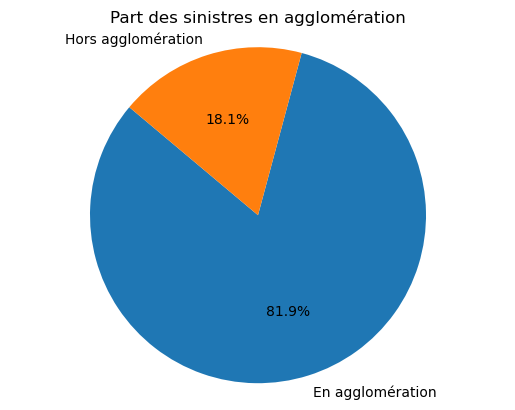

In [19]:
# Proportion d'agglomération

# Comptabiliser le nombre de lignes par modalité
c_agg = data['agg'].value_counts()

# Calcul des proportions
p_agg = (c_agg / len(data['agg'])) * 100

# Création du graphique en secteurs
plt.pie(p_agg, labels=p_agg.index, autopct='%1.1f%%', startangle=140)
plt.title("Part des sinistres en agglomération")
plt.axis('equal')

# Afficher le graphique
plt.show()

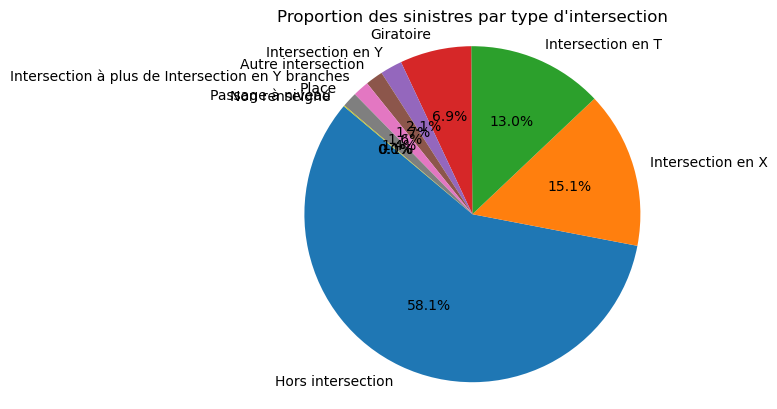

In [21]:
# Proportion d'intersection

# Comptabiliser le nombre de lignes par modalité
c_int = data['int'].value_counts()

# Calcul des proportions
p_int = (c_int / len(data['int'])) * 100

# Création du graphique en secteurs
plt.pie(p_int, labels=p_int.index, autopct='%1.1f%%', startangle=140)
plt.title("Proportion des sinistres par type d'intersection")
plt.axis('equal')

# Afficher le graphique
plt.show()

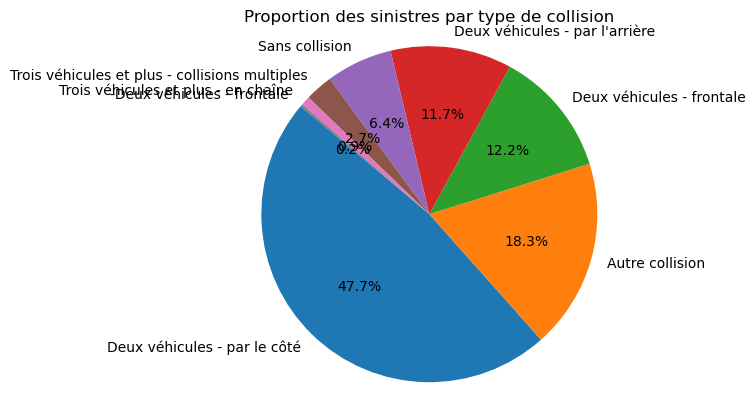

In [22]:
# Proportion de collision

# Comptabiliser le nombre de lignes par modalité
c_col = data['col'].value_counts()

# Calcul des proportions
p_col = (c_col / len(data['col'])) * 100

# Création du graphique en secteurs
plt.pie(p_col, labels=p_col.index, autopct='%1.1f%%', startangle=140)
plt.title("Proportion des sinistres par type de collision")
plt.axis('equal')

# Afficher le graphique
plt.show()

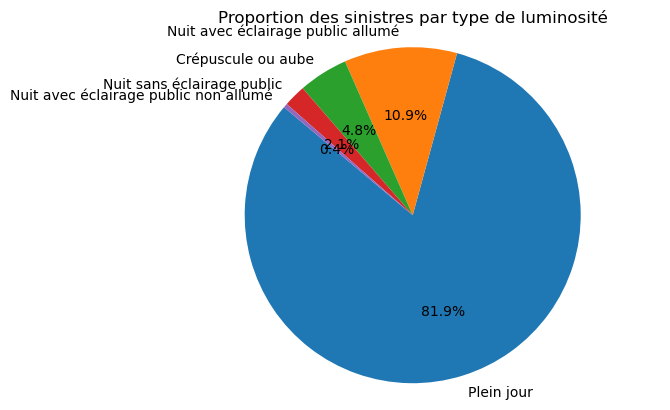

In [23]:
# Proportion de type de lumières

# Comptabiliser le nombre de lignes par modalité
c_lum = data['lum'].value_counts()

# Calcul des proportions
p_lum = (c_lum / len(data['lum'])) * 100

# Création du graphique en secteurs
plt.pie(p_lum, labels=p_lum.index, autopct='%1.1f%%', startangle=140)
plt.title("Proportion des sinistres par type de luminosité")
plt.axis('equal')

# Afficher le graphique
plt.show()

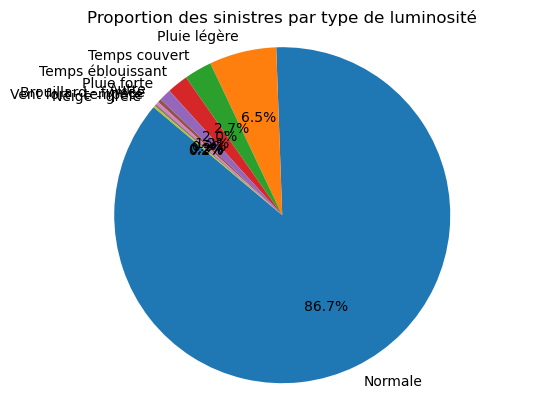

In [24]:
# Proportion de conditions athmosphériques

# Comptabiliser le nombre de lignes par modalité
c_atm = data['atm'].value_counts()

# Calcul des proportions
p_atm = (c_atm / len(data['atm'])) * 100

# Création du graphique en secteurs
plt.pie(p_atm, labels=p_atm.index, autopct='%1.1f%%', startangle=140)
plt.title("Proportion des sinistres par type de conditions atmosphériques")
plt.axis('equal')

# Afficher le graphique
plt.show()

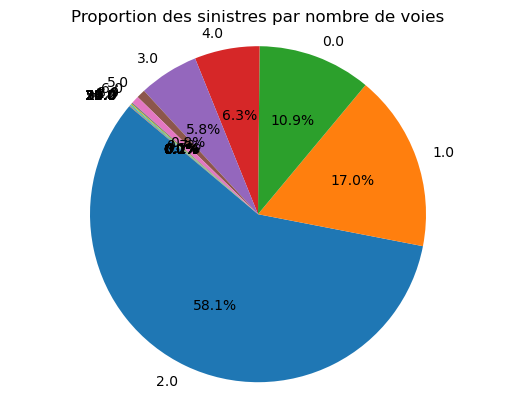

In [25]:
# Proportion du nombre de voies

# Comptabiliser le nombre de lignes par modalité
c_nbv = data['nbv'].value_counts()

# Calcul des proportions
p_nbv = (c_nbv / len(data['nbv'])) * 100

# Création du graphique en secteurs
plt.pie(p_nbv, labels=p_nbv.index, autopct='%1.1f%%', startangle=140)
plt.title("Proportion des sinistres par nombre de voies")
plt.axis('equal')

# Afficher le graphique
plt.show()

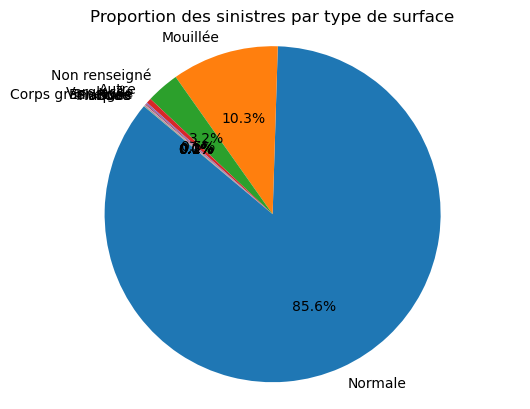

In [26]:
# Proportion de type de surface

# Comptabiliser le nombre de lignes par modalité
c_surf = data['surf'].value_counts()

# Calcul des proportions
p_surf = (c_surf / len(data['surf'])) * 100

# Création du graphique en secteurs
plt.pie(p_surf, labels=p_surf.index, autopct='%1.1f%%', startangle=140)
plt.title("Proportion des sinistres par type de surface")
plt.axis('equal')

# Afficher le graphique
plt.show()

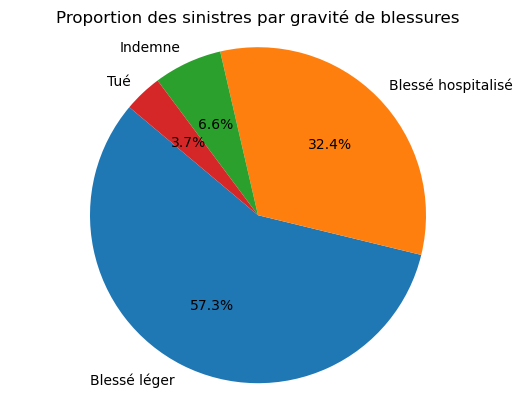

In [27]:
# Proportion de blessés

# Comptabiliser le nombre de lignes par modalité
c_grav = data['grav'].value_counts()

# Calcul des proportions
p_grav = (c_grav / len(data['grav'])) * 100

# Création du graphique en secteurs
plt.pie(p_grav, labels=p_grav.index, autopct='%1.1f%%', startangle=140)
plt.title("Proportion des sinistres par gravité de blessures")
plt.axis('equal')

# Afficher le graphique
plt.show()

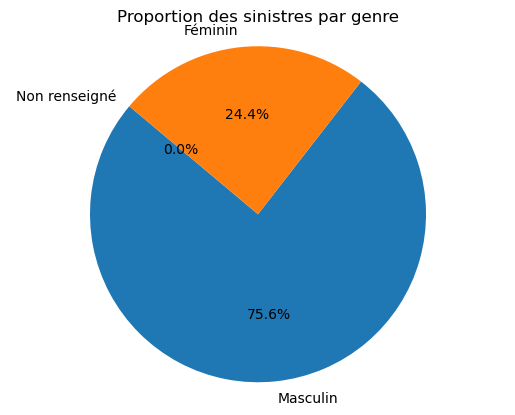

In [28]:
# Proportion d'individus par sexe

# Comptabiliser le nombre de lignes par modalité
c_sexe = data['sexe'].value_counts()

# Calcul des proportions
p_sexe = (c_sexe / len(data['sexe'])) * 100

# Création du graphique en secteurs
plt.pie(p_sexe, labels=p_sexe.index, autopct='%1.1f%%', startangle=140)
plt.title("Proportion des sinistres par genre")
plt.axis('equal')

# Afficher le graphique
plt.show()

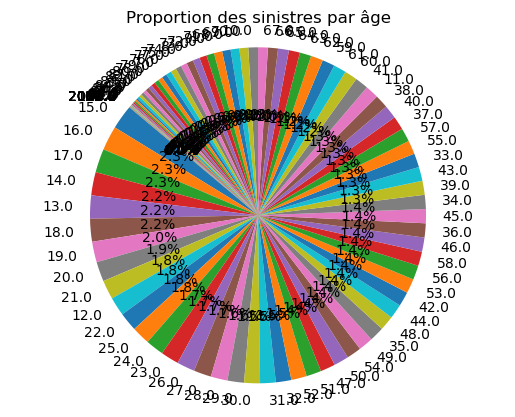

In [29]:
# Proportion d'âge

# Comptabiliser le nombre de lignes par modalité
c_age = data['age'].value_counts()

# Calcul des proportions
p_age = (c_age / len(data['age'])) * 100

# Création du graphique en secteurs
plt.pie(p_age, labels=p_age.index, autopct='%1.1f%%', startangle=140)
plt.title("Proportion des sinistres par âge")
plt.axis('equal')

# Afficher le graphique
plt.show()

# faire des tranches d'âges!

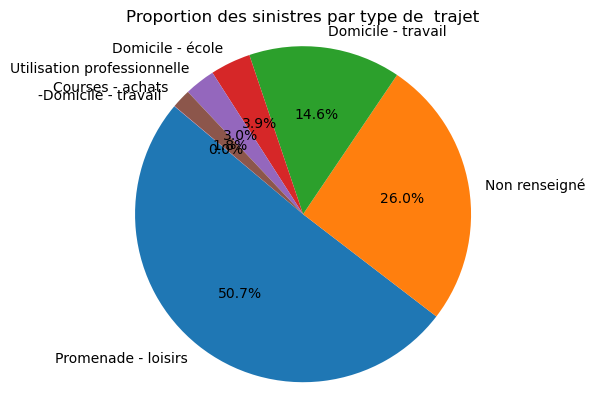

In [30]:
# Proportion de type de trajet

# Comptabiliser le nombre de lignes par modalité
c_trajet = data['trajet'].value_counts()

# Calcul des proportions
p_trajet = (c_trajet / len(data['trajet'])) * 100

# Création du graphique en secteurs
plt.pie(p_trajet, labels=p_trajet.index, autopct='%1.1f%%', startangle=140)
plt.title("Proportion des sinistres par type de  trajet")
plt.axis('equal')

# Afficher le graphique
plt.show()

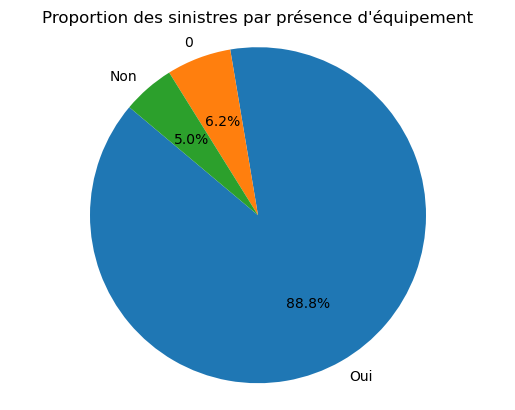

In [33]:
# Proportion par présence d'équipement

# Comptabiliser le nombre de lignes par modalité
c_secuexist = data['secuexist'].value_counts()

# Calcul des proportions
p_secuexist = (c_secuexist / len(data['secuexist'])) * 100

# Création du graphique en secteurs
plt.pie(p_secuexist, labels=p_secuexist.index, autopct='%1.1f%%', startangle=140)
plt.title("Proportion des sinistres par présence d'équipement")
plt.axis('equal')

# Afficher le graphique
plt.show()

# Transformer les vides/0 en non renseigné

### 2. Analyse temporelle

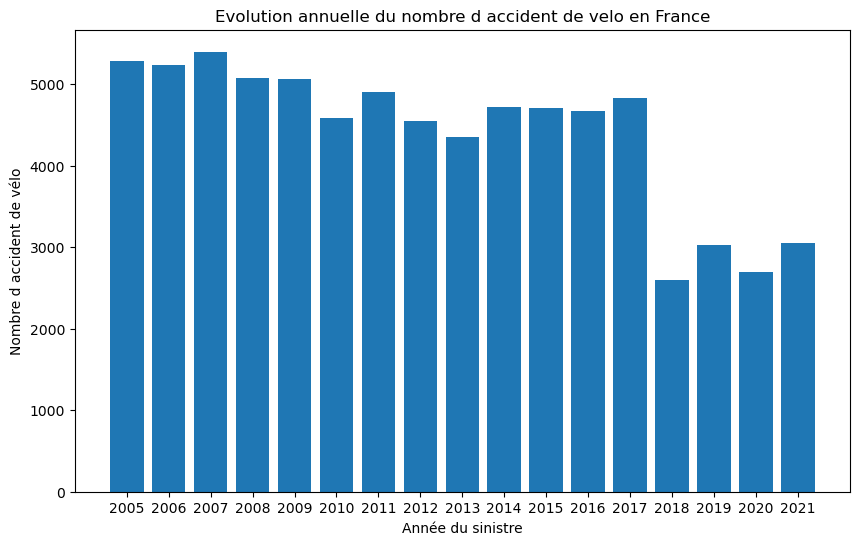

In [6]:
# Compter le nombre d'accident par an
acc_an = data['an'].value_counts().reset_index()
acc_an.columns = ['annee', 'nombre_accidents']

# affichage du nombre d'accident par an
plt.figure(figsize=(10, 6))

plt.bar(acc_an['annee'], acc_an['nombre_accidents'])
plt.xlabel('Année du sinistre')
plt.ylabel('Nombre d accident de vélo')
plt.xticks(acc_an['annee'])
plt.title('Evolution annuelle du nombre d accident de velo en France')
plt.show()

# Nombre de sinistres divisé par 2 à partir de 2018, impact du Covid?

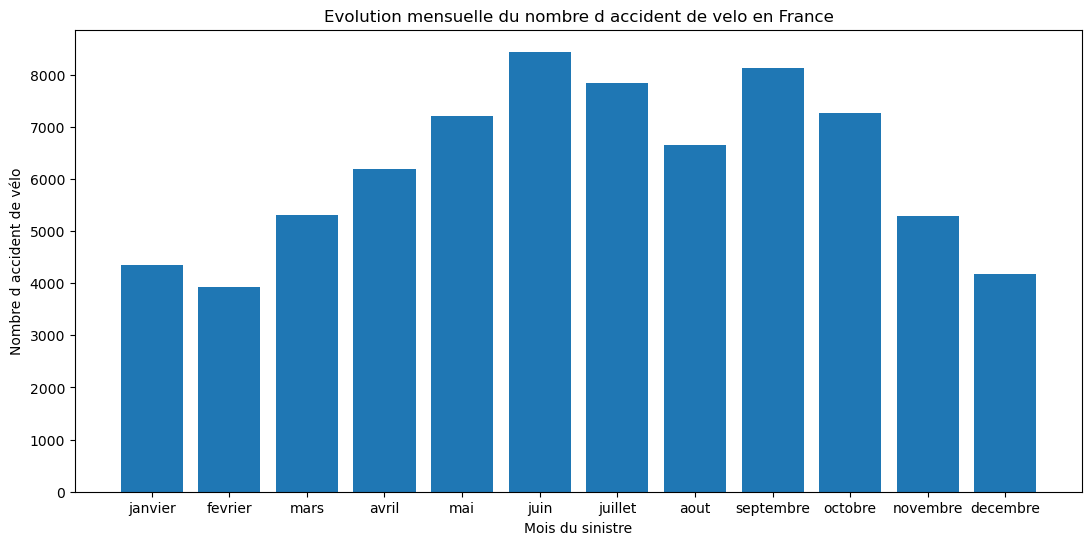

In [7]:
# Compter le nombre d'accident chaque mois
acc_mois = data['mois'].value_counts().reset_index()
# Liste des mois dans l'ordre de l'arrivée
ordre_des_mois = ["janvier", "fevrier", "mars", "avril", "mai", "juin", "juillet", "aout", "septembre", "octobre", "novembre", "decembre"]

acc_mois.columns = ['mois', 'nombre_accidents']

acc_mois['mois'] = pandas.Categorical(acc_mois['mois'], categories=ordre_des_mois, ordered=True)
acc_mois = acc_mois.sort_values(by='mois')

# affichage du nombre d'accident par mois
plt.figure(figsize=(13, 6))

plt.bar(acc_mois['mois'], acc_mois['nombre_accidents'])
plt.xlabel('Mois du sinistre')
plt.ylabel('Nombre d accident de vélo')
plt.xticks(rotation=0)
plt.xticks(acc_mois['mois'])
plt.title('Evolution mensuelle du nombre d accident de velo en France')
plt.show()

# Diminution du nombre d'accident de vélo en hiver: logique puisque moins de sortie en vélo lorsqu'il fait froid/nuit

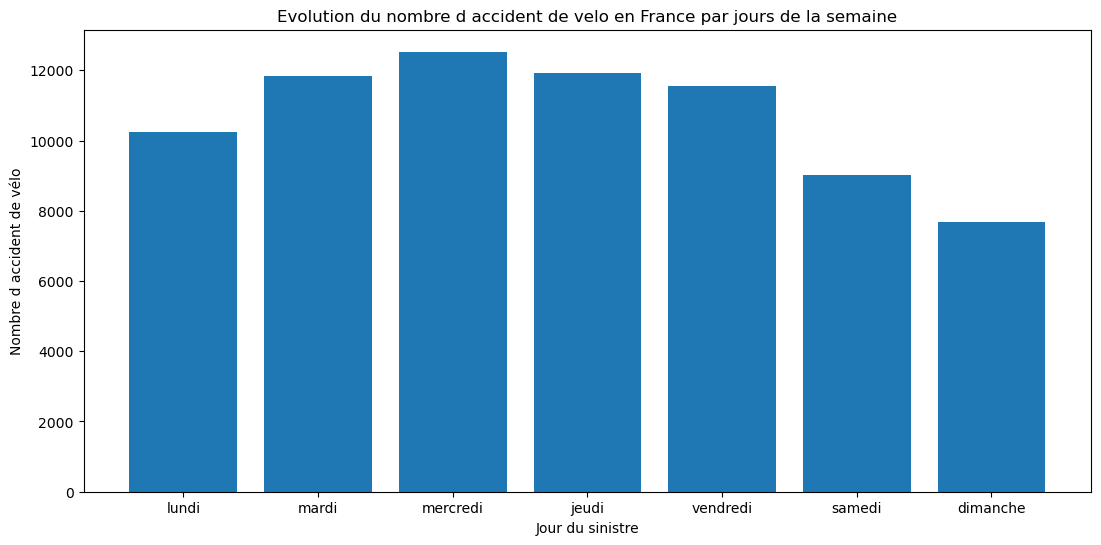

In [14]:
# Compter le nombre d'accident chaque jour de la semaine
acc_jours = data['jour'].value_counts().reset_index()

# Liste des jours dans l'ordre de l'arrivée
ordre_des_jours = ["lundi", "mardi", "mercredi", "jeudi", "vendredi", "samedi", "dimanche"]

acc_jours.columns = ['jour', 'nombre_accidents']

acc_jours['jour'] = pandas.Categorical(acc_jours['jour'], categories=ordre_des_jours, ordered=True)
acc_jours = acc_jours.sort_values(by='jour')

# affichage du nombre d'accident par jours
plt.figure(figsize=(13, 6))

plt.bar(acc_jours['jour'], acc_jours['nombre_accidents'])
plt.xlabel('Jour du sinistre')
plt.ylabel('Nombre d accident de vélo')
plt.xticks(rotation=0)
plt.xticks(acc_jours['jour'])
plt.title('Evolution du nombre d accident de velo en France par jours de la semaine')
plt.show()

In [17]:
# Compter le nombre d'accident par heures
acc_h = data['hrmn'].value_counts().reset_index()
acc_h.columns = ['hrmn', 'nombre_accidents']

# affichage du nombre d'accident par heures
#plt.figure(figsize=(10, 6))

#plt.bar(acc_h['hrmn'], acc_h['nombre_accidents'])
#plt.xlabel('Heure du sinistre')
#plt.ylabel('Nombre d accident de vélo')
#plt.xticks(acc_h['annee'])
#plt.title('Evolution par heure du nombre d accident de velo en France')
#plt.show()

#### Sorties graphiques carte de France

In [15]:
data=data.dropna(subset=['long'])
data=data.dropna(subset=['lat'])

#réduction de la table pour voir (janvier 2021)
data2021 = data[data.an==2012]
data2021 = data2021[data2021.mois == "janvier"]
data2021.head

# Création de la carte centrée sur la France
m = folium.Map(location=[46.603354, 1.888334], zoom_start=6)                                                              

# Parcourir les lignes du DataFrame pour ajouter des marqueurs sur la carte
for index, row in data2021.iterrows():
    latitude, longitude = row['lat'], row['long']
    gravite = row['grav']

    # Détermination de la couleur du marqueur en fonction de la gravité
    if gravite == 'Tué':
        marker_color = 'red'
    elif gravite == 'Indemne':
        marker_color = 'green'
    elif gravite == 'Blessé léger':
        marker_color = 'orange'
    elif gravite == 'Blessé hospitalisé':
        marker_color = 'blue'

    # Ajout d'un marqueur à la carte
    folium.Marker([latitude, longitude], icon=folium.Icon(icon='circle' , color=marker_color)).add_to(m)
    
m
# Enregistrement de la carte dans un fichier HTML
#m.save('carte_accidents_velo.html')

# Ouvrir la carte dans le navigateur par défaut
#import webbrowser
#webbrowser.open('carte_accidents_velo.html')

PARTIE 3 : Machine Learning

In [2]:
import pandas
dataML = pandas.read_excel(r"Base_commune.xlsx", decimal=",")  
dataML.head(5)

,com,nb_accidents,nb_indemne,nb_tue,nb_blesse_hospi,nb_hospi_leger,part_homme,part_agglo,lum,jour,...,prof,age,circ,lum_degradee,atm_degradee,nbvoies,secu,equipement,obsm,score_norm
0,10009,1,0,0,0,1,1.0,0.0,Plein jour,mardi,...,Plat,15.0,Bidirectionnelle,0.0,0.0,2.0,0.0,Aucun équipement,Véhicule,1.000000
1,1008,1,0,1,0,0,1.0,1.0,Plein jour,mercredi,...,Plat,79.0,Bidirectionnelle,0.0,1.0,2.0,1.0,Casque,Véhicule,3.000000
2,10096,1,0,0,1,0,1.0,1.0,Plein jour,mercredi,...,Plat,7.0,Bidirectionnelle,0.0,0.0,2.0,0.0,Aucun équipement,Véhicule,2.000000
3,10114,2,0,0,1,1,1.0,1.0,Plein jour,samedi,...,Plat,10.5,Bidirectionnelle,0.0,0.0,2.0,1.0,Casque,Véhicule,2.313262
4,10195,1,0,1,0,0,1.0,0.0,Plein jour,lundi,...,Pente,69.0,Non renseigné,0.0,0.0,0.0,1.0,Casque,Aucun,3.000000


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Divisez les données en ensemble d'entraînement et ensemble de test
X = dataML[['part_homme', 'part_agglo','lum', 'jour', 'mois', 'an', 'atm', 'situ', 'prof', 'age', 'lum_degradee', 'atm_degradee', 'nbvoies', 'secu', 'equipement', 'obsm']]
y = dataML['score_norm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créez et entraînez le modèle Random Forest
arbre = DecisionTreeClassifier()
arbre.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = arbre.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

ValueError: could not convert string to float: 'Plein jour'

In [43]:
accuracy
#classification_rep

0.0

In [20]:
coefficients = model.coef_
feature_names = X.columns
for feature, coef in zip(feature_names, coefficients[0]):
    print(f"{feature}: {coef}")

AttributeError: 'RandomForestClassifier' object has no attribute 'coef_'

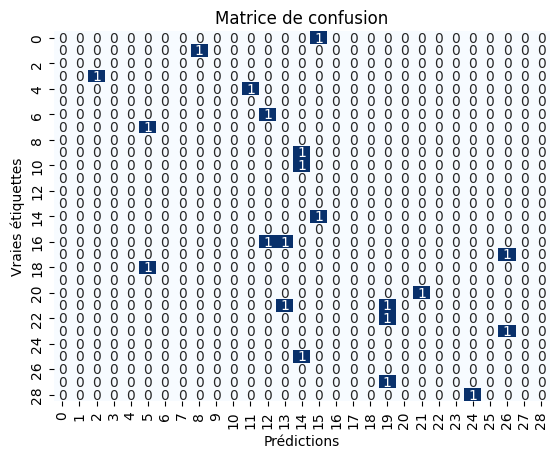

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion')
plt.show()